# Balancer Simulations Math Challenge - Basic Exercises

This is a series of exercises to gain intuition for the core algorithm in Balancer Pools: the Value Function, and invariant V.

**Exercise:** We'll work on Step 1 questions in our working session on May 25 in teams of 2, facilitated by Octopus and Angela.  
**Challenges:** Step 2 will be homework assignments, we'll offer a range challenges, XXX

## Exercise:   
Let's set up a pool.  

We have 100 Token A and 100 Token B, with equal weights.  
The price definition in our pool is constraint by the
Invariant V in Balancer Pools. 

a_bal = balance of token A  
b_bal = balance of token B  
a_weight = weight of token A  
b_weight = weight of token B   

The weights in this pool are equal for both tokens.
For now, we don't have a swap fee.

# Q1.1: 
What's the initial spot price of token A in token B?

In [1]:
a_bal = 100
b_bal = 100

a_weight = 0.5
b_weight = 0.5

In [2]:
spot_price = (a_bal/a_weight)/(b_bal/b_weight)
print(spot_price)

1.0


# Q1.2:
Now let's assume a series of 99 swaps. With every swap, **1.0 token A is bought from the pool, against token B**.  

**a) Create a table "buy_A"** with

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function. 

**b) What do you notice in general?**
Write down your findings (in words).

**c) How much would Alice have to pay in token B when buying the first 1.0 token A?**
Write down your findings (in words). Compare with the initial Spotprice.

In [3]:
import pandas as pd

In [4]:
a_bal = 100
b_bal = 100

a_weight = 0.5
b_weight = 0.5

In [5]:
a = [100 - i for i in range(100)]
b = [100 * 100 / i for i in a]

pool = {
    'a': a,
    'b': b
}

In [6]:
pool_df = pd.DataFrame.from_dict(pool)
pool_df

,a,b
0,100,100.000000
1,99,101.010101
2,98,102.040816
3,97,103.092784
4,96,104.166667
...,...,...
95,5,2000.000000
96,4,2500.000000
97,3,3333.333333
98,2,5000.000000


In [7]:
a_bal = 100
b_bal = 100
a_weight = 0.5
b_weight = 0.5
s_f = 0.0 #swap fee

inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
a_vals = pd.Series(range(100,0,-1)) #create df with based on a_vals

buy_A = pd.DataFrame(a_vals, columns=['token_A'])
buy_A['invariant'] = inv #value required to calculate token B value

#create values for plot, add Y_balances according to current invariant
buy_A['token_B'] = (buy_A.invariant/(buy_A.token_A**a_weight))**(1/b_weight)

buy_A.head(10)

,token_A,invariant,token_B
0,100,100.0,100.000000
1,99,100.0,101.010101
2,98,100.0,102.040816
3,97,100.0,103.092784
4,96,100.0,104.166667
5,95,100.0,105.263158
6,94,100.0,106.382979
7,93,100.0,107.526882
8,92,100.0,108.695652
9,91,100.0,109.890110


In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

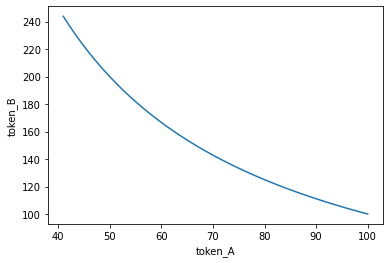

In [9]:
plt.plot(buy_A.head(60)['token_A'], buy_A.head(60)['token_B'])
plt.xlabel("token_A")
plt.ylabel("token_B")
plt.show()

## Curve-ball Question #1
Which transaction(s) ends up cheaper?
* Purchasing 99 token_A's in 99 seperate even transactions.
* Purchasing 99 token_A's in a single transaction.

In [10]:
# Purchasing 99 tokens in 99 seperate even transactions:
seperate_total_cost = buy_A[buy_A['token_A'] == 1].iloc[0]['token_B'] - buy_A[buy_A['token_A'] == 100].iloc[0]['token_B']
print(seperate_total_cost)

9900.0


In [11]:
# Purchasing 99 tokens in 1 transaction:
bulk_total_cost = 100*((100/(100-99))**(0.5/0.5)-1)
print(bulk_total_cost)

9900.0


It appears that both paths appear equivalent in terms of price of exchange.

## Curve-ball Question #2
What about if we factor in pool fees > 0% where fees get immediately added to the pool asset balance(s)?

Assumptions:
* A 0.30% swap fee
* Invariant value changes post-swap with the addition of swap fee(s).
* Taking the calc_given_in function outlined in [balancer_math.py](https://token-engineering-balancer.gitbook.io/balancer-simulations/additional-code-and-instructions/balancer-the-python-edition/balancer_math.py)

In [12]:
swap_fee = 0.003

In [13]:
# Purchasing 99 tokens in 99 seperate even transactions:
a_bal = 100
b_bal = 100
a_weight = 0.5
b_weight = 0.5
s_f = 0.003 #swap fee

inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
a_vals = pd.Series(range(100,0,-1)) #create df with based on a_vals

buy_A_with_fees = pd.DataFrame(a_vals, columns=['token_A'])

token_B_list = [100]
inv_list = [inv]
for a_bal in buy_A['token_A']:
    # skip a_bal=b_bal=100 and 
    if a_bal == 100: continue
    
    a_bal = a_bal+1
    b_bal = token_B_list[-1]
    
    amount_in_B = b_bal*((a_bal/(a_bal-1))**(a_weight/b_weight)-1)*(1/(1-s_f))
    new_b_bal = token_B_list[-1]+amount_in_B
    
    token_B_list.append(new_b_bal)
    
    inv = ((a_bal-1)**a_weight)*(new_b_bal**b_weight) #calculate invariant
    # inv = 100
    inv_list.append(inv)

buy_A_with_fees['invariant'] = inv_list
buy_A_with_fees['token_B'] = token_B_list
print(buy_A_with_fees)

    token_A   invariant       token_B
0       100  100.000000    100.000000
1        99  100.001505    101.013140
2        98  100.003024    102.046988
3        97  100.004559    103.102185
4        96  100.006111    104.179397
..      ...         ...           ...
95        5  100.437834   2017.551712
96        4  100.468052   2523.457357
97        3  100.505834   3367.140859
98        2  100.556225   5055.777198
99        1  100.631841  10126.767367

[100 rows x 3 columns]


In [14]:
# Result
seperate_total_cost = buy_A_with_fees[buy_A_with_fees['token_A'] == 1].iloc[0]['token_B'] - buy_A_with_fees[buy_A_with_fees['token_A'] == 100].iloc[0]['token_B']
print(seperate_total_cost)

10026.76736702183


In [15]:
# Purchasing 99 tokens in 1 transactions:
bulk_total_cost = 100*((100/(100-99))**(0.5/0.5)-1)*(1/(1-swap_fee))
print(bulk_total_cost)

9929.789368104313


In [16]:
# Difference
print("Difference seperate/bulk: "+str(seperate_total_cost-bulk_total_cost))
print("Ratio seperate/bulk: "+str(seperate_total_cost/bulk_total_cost))

Difference seperate/bulk: 96.97799891751674
Ratio seperate/bulk: 1.0097663701940165


In [17]:
# Test:
bulk_total_cost = 100*((100/(100-1))**(0.5/0.5)-1)*(1/(1-swap_fee))
print(bulk_total_cost)

1.0131404313952022


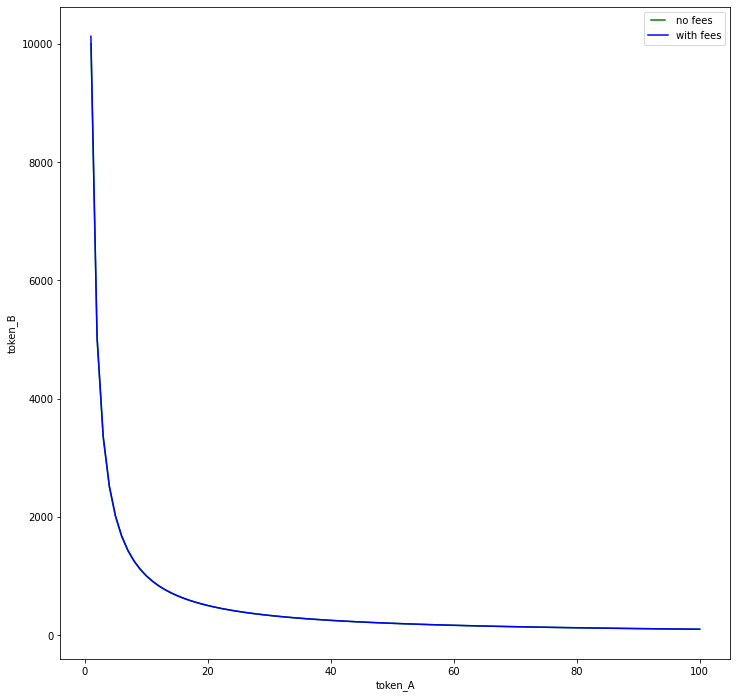

In [18]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(12, 12))
line1, = plt.plot(buy_A['token_A'], buy_A['token_B'], color='green', label="no fees")
line2, = plt.plot(buy_A_with_fees['token_A'], buy_A_with_fees['token_B'], color='blue', label="with fees")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

plt.xlabel("token_A")
plt.ylabel("token_B")


plt.show()

# Q1.3:

Now let's assume a series of 99 swaps in the opposite direction. We start again with the original state: We have 100 Token A and 100 Token B.   
With every swap, **1.0 token B is bought from the pool, against token A**.

Create a table **'buy_B'** with

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function.

In [19]:
a_bal = 100
b_bal = 100
a_weight = 0.5
b_weight = 0.5
s_f = 0.0 #swap fee

inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
b_vals = pd.Series(range(100,0,-1)) #create df with based on b_vals

buy_B = pd.DataFrame(b_vals, columns=['token_B'])
buy_B['invariant'] = inv #value required to calculate token A value

#create values for plot, add Y_balances according to current invariant
buy_B['token_A'] = (buy_B.invariant/(buy_B.token_B**b_weight))**(1/a_weight)

buy_B.tail(10)

,token_B,invariant,token_A
90,10,100.0,1000.000000
91,9,100.0,1111.111111
92,8,100.0,1250.000000
93,7,100.0,1428.571429
94,6,100.0,1666.666667
95,5,100.0,2000.000000
96,4,100.0,2500.000000
97,3,100.0,3333.333333
98,2,100.0,5000.000000
99,1,100.0,10000.000000


# Q1.4:
What is the new price of token A in token B after 90 swaps token A for B?

In [20]:
# Where balance of token_B = 100 - 90 = 10:
buy_B.loc[buy_B['token_B']<= 10]

,token_B,invariant,token_A
90,10,100.0,1000.000000
91,9,100.0,1111.111111
92,8,100.0,1250.000000
93,7,100.0,1428.571429
94,6,100.0,1666.666667
95,5,100.0,2000.000000
96,4,100.0,2500.000000
97,3,100.0,3333.333333
98,2,100.0,5000.000000
99,1,100.0,10000.000000


In [21]:
# Spot Price
spot_price = buy_B.loc[buy_B['token_B']== 10]['token_A'] / buy_B.loc[buy_B['token_B']== 10]['token_B']
print(spot_price)

90    100.0
dtype: float64


# Q1.5:  
Now create a graph (use plotly or similar), and draw the full curve for this series of both kinds of swaps - the AMM curve.

In [22]:
buy_A.head(5)

,token_A,invariant,token_B
0,100,100.0,100.000000
1,99,100.0,101.010101
2,98,100.0,102.040816
3,97,100.0,103.092784
4,96,100.0,104.166667


In [23]:
buy_B.head(5)

,token_B,invariant,token_A
0,100,100.0,100.000000
1,99,100.0,101.010101
2,98,100.0,102.040816
3,97,100.0,103.092784
4,96,100.0,104.166667


In [24]:
combined = pd.concat([buy_A,buy_B[buy_B['token_B'] < 100]])

In [25]:
combined = combined.sort_values(by=['token_B'])

In [26]:
combined_p = combined[(combined['token_A'] <= 500) & (combined['token_B'] <= 500)]

In [27]:
combined_p

,token_A,invariant,token_B
80,500.000000,100.0,20.000000
79,476.190476,100.0,21.000000
78,454.545455,100.0,22.000000
77,434.782609,100.0,23.000000
76,416.666667,100.0,24.000000
...,...,...,...
76,24.000000,100.0,416.666667
77,23.000000,100.0,434.782609
78,22.000000,100.0,454.545455
79,21.000000,100.0,476.190476


In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

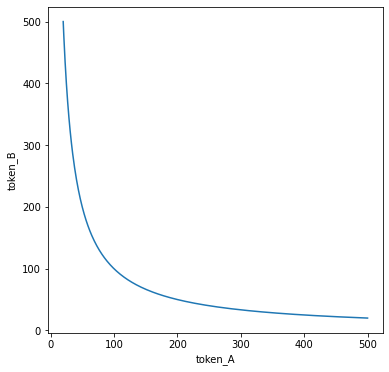

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(combined_p['token_A'], combined_p['token_B'])
plt.xlabel("token_A")
plt.ylabel("token_B")


plt.show()

# Q1.6:
Take this plot, and mark 
- the initial price in Q1.1 (starting price)
- the new price in Q1.4 (after 90 swaps)

In [30]:
# Initial price where balance of token_A = 100:
print(combined.loc[combined['token_B']== 100])
print("Spot price at this point: " + str(1))

# Where balance of token_B = 100 - 90 = 10:
print(combined.loc[combined['token_B']== 10])
print("Spot price at this point: " + str(100))

   token_A  invariant  token_B
0    100.0      100.0    100.0
Spot price at this point: 1
    token_A  invariant  token_B
90   1000.0      100.0     10.0
Spot price at this point: 100


# Q1.7:
Formulate a "rule of a thumb", how do swaps effect the price?

### As the proportion of tokens in the pool get more and more offset, the more drastic the 'slippage' for making a unit trade in the pool becomes.

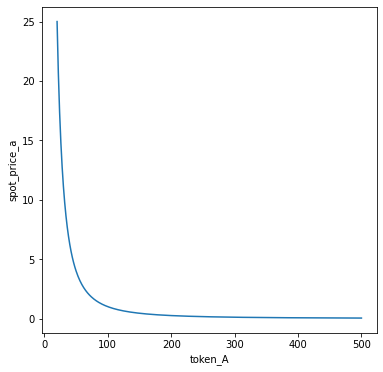

In [31]:
combined['spot_price_a'] = combined['token_B'] / combined['token_A']

combined_p = combined[(combined['token_A'] <= 500) & (combined['token_B'] <= 500)]

plt.figure(figsize=(6, 6))
plt.plot(combined_p['token_A'], combined_p['spot_price_a'])
plt.xlabel("token_A")
plt.ylabel("spot_price_a")


plt.show()

# Now, let's consider weights!

We continue with the value function $V = a^w_a*b^w_b  $
where  
$a$ = balance of token asset A  
$b$ = balancer of token asset B  
$w_a$ = weight of token asset A  
$w_b$ = weight of token asset B  

# Q2.1:  
Write down the value function for the pool in Q1.1!

In [32]:
a_bal = 100
b_bal = 100

a_weight = 0.5
b_weight = 0.5

In [33]:
V = (a_bal**a_weight)*(b_bal**b_weight)
print(V)

100.0


# Q2.2:
Let's got back to your initial balances in Step 1 in the pool:  
100 tokens A  
100 tokens B  

How do you need to change the weights in order to land at a **price of  
4 tokens A : 1 token B**


$ SP = \frac{\frac{B_i}{W_i}}{\frac{B_o}{W_o}} $

Where we know $ SP = 4, B_i = 100, B_o = 100 $

We solve for $ W_i $ and $ W_o $

$W_i+W_o=1$

$4=(\frac{W_o}{W_i})$

$W_o = 4*W_i$

$W_o+W_i = 1$

$W_o=1-W_i$

$ 1-W_i = 4*W_i$

$5*W_i = 1$

Therefore,

$W_i = 0.2$

$W_o = 0.8$




In [34]:
a_weight = 0.2
b_weight = 0.8

spot_price = (a_bal/a_weight)/(b_bal/b_weight)
print(spot_price)

4.0


Provide the new value function!

In [35]:
V = (a_bal**a_weight)*(b_bal**b_weight)
print(V)

100.00000000000003


# Q2.3:
Create a graph showing the new AMM Curve in Q2.2  
Compare to the graph in Q1.4 - how does a change in weights change the graph?

In [36]:
a_bal = 100
b_bal = 100
a_weight = 0.2
b_weight = 0.8
s_f = 0.0 #swap fee

inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
a_vals = pd.Series(range(100,0,-1)) #create df with based on a_vals

buy_A = pd.DataFrame(a_vals, columns=['token_A'])
buy_A['invariant'] = inv #value required to calculate token B value

#create values for plot, add Y_balances according to current invariant
buy_A['token_B'] = (buy_A.invariant/(buy_A.token_A**a_weight))**(1/b_weight)

In [37]:
a_bal = 100
b_bal = 100
a_weight = 0.2
b_weight = 0.8
s_f = 0.0 #swap fee

inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant
b_vals = pd.Series(range(100,0,-1)) #create df with based on b_vals

buy_B = pd.DataFrame(b_vals, columns=['token_B'])
buy_B['invariant'] = inv #value required to calculate token A value

#create values for plot, add Y_balances according to current invariant
buy_B['token_A'] = (buy_B.invariant/(buy_B.token_B**b_weight))**(1/a_weight)

In [38]:
w_combined = pd.concat([buy_A,buy_B[buy_B['token_B'] < 100]])

In [39]:
w_combined = w_combined.sort_values(by=['token_B'])

In [40]:
w_combined_p = w_combined[(w_combined['token_A'] <= 500) & (w_combined['token_B'] <= 500)]

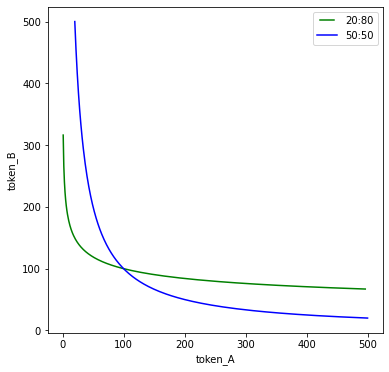

In [41]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(6, 6))
line1, = plt.plot(w_combined_p['token_A'], w_combined_p['token_B'], color='green', label="20:80")
line2, = plt.plot(combined_p['token_A'], combined_p['token_B'], color='blue', label="50:50")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

plt.xlabel("token_A")
plt.ylabel("token_B")


plt.show()

# Q2.4:
Compare token prices in this pool.  
How much would Alice have to pay in case there are only 2 tokens left in the pool  
    **a) buy 1.0 token A for token B**  
    **b) buy 1.0 token B for token A**   

In [42]:
w_combined_p[(w_combined_p['token_A'] >= 1.0) & (w_combined_p['token_A'] <= 3.0)]

,token_A,invariant,token_B
97,3.0,100.0,240.281141
98,2.0,100.0,265.914795
99,1.0,100.0,316.227766


In [43]:
# Spot Price
inst_a_bal = 2.0
inst_b_bal = buy_A.loc[buy_A['token_A']== 2]['token_B']
a_spot_price = inst_b_bal / inst_a_bal

inst_b_bal_after_trade = (inv/((inst_a_bal - 1)**a_weight))**(1/b_weight)
a_effective_price = (inst_b_bal_after_trade - inst_b_bal)
print(a_spot_price)
print(a_effective_price)

98    132.957397
Name: token_B, dtype: float64
98    50.312971
Name: token_B, dtype: float64
